# 2. ANALISIS EXPLORATORIO
## 2.1  OBTENER LOS DATOS DE LA BASE DE DATOS
instalamos librerias primero para poder realizar el analisis y obtencion de datos.
```pip install mysql-connector-python pandas matplotlib seaborn```

In [13]:
import pandas as pd
import mysql.connector

# Conectar a la base de datos MySQL
conexion = mysql.connector.connect(
    host="34.172.242.238", 
    user="root",        
    password="gerenciales13",  
    database="practica13" 
)

# Crear el cursor
cursor = conexion.cursor()

# Definir la consulta SQL para obtener los datos
consulta = """
SELECT id_orden, fecha_compra, id_cliente, genero_cliente, edad_cliente, 
       categoria_producto, nombre_producto, precio_producto, cantidad_comprada, 
       total_orden, metodo_pago, region_envio
FROM ventas
"""

# Ejecutar la consulta
cursor.execute(consulta)

# Obtener los resultados y cargarlos en un DataFrame
columnas = [col[0] for col in cursor.description]  # Obtener nombres de las columnas
datos = cursor.fetchall()  # Obtener todos los datos
df = pd.DataFrame(datos, columns=columnas)

# Cerrar la conexión
cursor.close()
conexion.close()

# Verificar los primeros registros
df.head()


,id_orden,fecha_compra,id_cliente,genero_cliente,edad_cliente,categoria_producto,nombre_producto,precio_producto,cantidad_comprada,total_orden,metodo_pago,region_envio
0,1,2023-07-23,103,Femenino,76,Ropa,Chaqueta,150.97,2,301.94,Efectivo,Centro
1,2,2023-07-20,436,Masculino,49,Accesorios,Reloj,157.99,3,473.97,Efectivo,Norte
2,3,2023-07-29,861,Masculino,38,Accesorios,Gorro,81.20,1,81.20,PayPal,Centro
3,4,2023-11-21,271,Femenino,57,Calzado,Pantuflas,155.28,5,776.40,Efectivo,Oeste
4,5,2023-12-02,107,Femenino,45,Ropa,Camiseta,11.24,2,22.48,Tarjeta de crédito,Centro



## 2.2 Calcular estadísticas básicas (media, mediana, moda) para las variables numéricas

Calculamos la media, mediana y moda de las columnas del dataframe que son de tipo numerico de la siguiente forma:

In [14]:
# Intentar convertir las columnas relevantes a valores numéricos
df['total_orden'] = pd.to_numeric(df['total_orden'], errors='coerce')
df['precio_producto'] = pd.to_numeric(df['precio_producto'], errors='coerce')

# Verificar si hay valores faltantes después de la conversión
print("Valores faltantes tras convertir 'total_orden' y 'precio_producto' a numéricos:")
print(df[['total_orden', 'precio_producto']].isnull().sum())

# Repetir el proceso para calcular las estadísticas básicas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Crear un diccionario para almacenar los resultados
estadisticas = {
    "Columna": [],
    "Media": [],
    "Mediana": [],
    "Moda": []
}

# Calcular estadísticas básicas (media, mediana, moda) para todas las columnas numéricas
for columna in columnas_numericas:
    media = df[columna].mean()
    mediana = df[columna].median()
    moda = df[columna].mode()[0] if not df[columna].mode().empty else 'No tiene moda'

    # Agregar los resultados al diccionario
    estadisticas["Columna"].append(columna)
    estadisticas["Media"].append(media)
    estadisticas["Mediana"].append(mediana)
    estadisticas["Moda"].append(moda)

# Convertir el diccionario a un DataFrame
df_estadisticas = pd.DataFrame(estadisticas)

# Mostrar el DataFrame
df_estadisticas


Valores faltantes tras convertir 'total_orden' y 'precio_producto' a numéricos:
total_orden        0
precio_producto    0
dtype: int64


,Columna,Media,Mediana,Moda
0,id_orden,4993.887140,4994.00,1.00
1,id_cliente,504.255588,506.00,726.00
2,edad_cliente,48.320637,48.00,32.00
3,precio_producto,104.909815,104.84,17.97
4,cantidad_comprada,3.000200,3.00,2.00
5,total_orden,314.673617,254.95,150.20


### Análisis:
#### edad_cliente:
- La media de la edad de los clientes es 48.32 años.
- La mediana es 48 años, lo que implica que la mitad de los clientes tienen 48 años o menos.
- La moda es 32, lo que significa que la edad de 32 años es la más frecuente entre los clientes.
#### precio_producto:
- El precio promedio de los productos es de 104.91.
- La mediana es 104.84, lo que significa que la mitad de los productos tienen un precio menor o igual a este valor.
- La moda es 17.97, lo que indica que hay productos con un precio de 17.97 que son bastante comunes.
#### cantidad_comprada:
- La media de la cantidad de productos comprados por orden es de 3.00.
- La mediana también es 3, lo que indica que la mitad de las órdenes incluyen al menos 3 productos.
- La moda es 2, lo que significa que la cantidad de 2 productos por orden es la más común.
#### total_orden:
- El promedio total de cada orden es de 314.67.
- La mediana es 254.95, lo que sugiere que el total de la mitad de las órdenes es igual o menor a este valor.
- La moda es 150.20, indicando que esta cantidad es la más frecuente entre los totales de las órdenes.

# 2.3 Crear visualizaciones para mostrar la distribución de ventas por categoría de producto y región.
instalamos librerias seaborn y matplotlib para poder realizar las respectivas graficas y utilizamos en el eje X las categorias de productos y lo dividimos por region en cada categoria lo que ayuda a identificar mejor las ventas para cada categoria y en que region se vendio mas. 


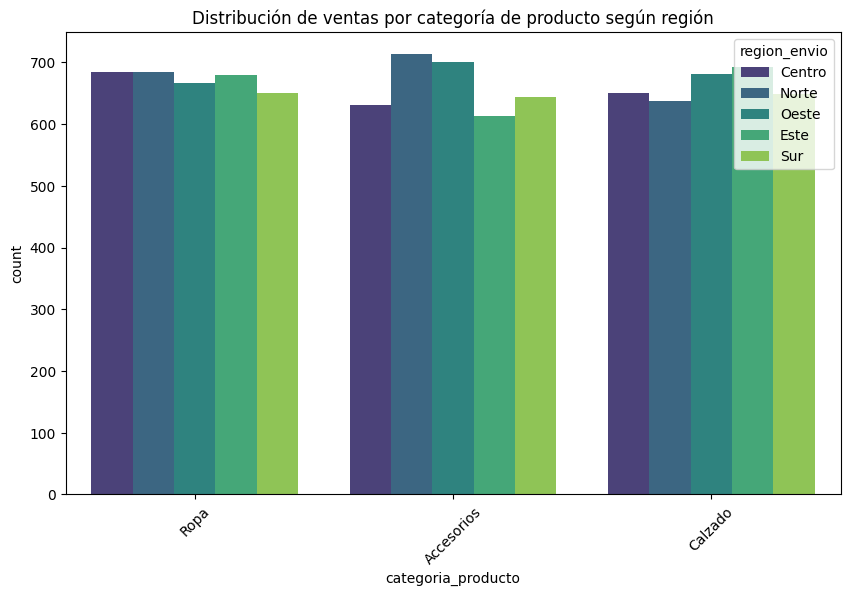

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


# Visualizar la distribución de ventas por región de envío
plt.figure(figsize=(10, 6))
sns.countplot(x='categoria_producto', data=df, hue='region_envio', palette='viridis')
plt.title('Distribución de ventas por categoría de producto según región')
plt.xticks(rotation=45)
plt.show()


## 3. Análisis de tendencias
### 3.1 Determinar los meses con mayores y menores ventas
Primero, es necesario extraer el mes de la columna fecha_compra para agrupar las ventas por mes. Se utiliza la función groupby para agrupar las ventas por mes (mes_compra) y calcular el total de las ventas mensuales (total_orden). Luego, se ordenan de mayor a menor para identificar las tendencias de ventas.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Convertir la columna 'fecha_compra' a tipo datetime si no lo está
dfcopy = df.copy()
dfcopy['fecha_compra'] = pd.to_datetime(dfcopy['fecha_compra'], errors='coerce')

# Extraer el mes en formato texto (nombre completo del mes)
dfcopy['mes_compra'] = dfcopy['fecha_compra'].dt.strftime('%B')

# Agrupar por mes y sumar el total de las ventas
ventas_por_mes = dfcopy.groupby('mes_compra')['total_orden'].sum().reset_index()

# Ordenar por total de ventas para identificar los meses con mayores y menores ventas
ventas_por_mes = ventas_por_mes.sort_values(by='total_orden', ascending=False)

# Mostrar los resultados en una tabla sin índices
tabla_resultados = tabulate(ventas_por_mes, headers=["Mes", "Total de Ventas"], tablefmt="grid", showindex=False)
print(tabla_resultados)


+-----------+-------------------+
| Mes       |   Total de Ventas |
+===========+===================+
| August    |            281121 |
+-----------+-------------------+
| March     |            277744 |
+-----------+-------------------+
| July      |            277262 |
+-----------+-------------------+
| January   |            275271 |
+-----------+-------------------+
| June      |            271332 |
+-----------+-------------------+
| October   |            268798 |
+-----------+-------------------+
| December  |            261679 |
+-----------+-------------------+
| November  |            255451 |
+-----------+-------------------+
| May       |            250737 |
+-----------+-------------------+
| April     |            243595 |
+-----------+-------------------+
| February  |            242587 |
+-----------+-------------------+
| September |            233921 |
+-----------+-------------------+


### 3.2 Identificar los productos más vendidos y los menos populares.
Se agrupan las ventas por nombre_producto y se suman las cantidades compradas (cantidad_comprada). Los resultados se ordenan para encontrar los productos más vendidos (mayor cantidad comprada) y los menos populares (menor cantidad comprada).

In [17]:
# Agrupar por nombre del producto y sumar la cantidad comprada
productos_mas_vendidos = df.groupby('nombre_producto')['cantidad_comprada'].sum().reset_index()

# Ordenar los productos de mayor a menor cantidad comprada
productos_mas_vendidos = productos_mas_vendidos.sort_values(by='cantidad_comprada', ascending=False)

# Mostrar los productos más vendidos (top 5)
print("Productos más vendidos:")
tabla_resultados1 = tabulate(productos_mas_vendidos.head(), headers=["nombre_producto", "cantidad_comprada"], tablefmt="grid", showindex=False)
print(tabla_resultados1)

# Mostrar los productos menos vendidos (bottom 5)
print("Productos menos populares:")
tabla_resultados2 = tabulate(productos_mas_vendidos.tail(), headers=["nombre_producto", "cantidad_comprada"], tablefmt="grid", showindex=False)
print(tabla_resultados2)


Productos más vendidos:
+-------------------+---------------------+
| nombre_producto   |   cantidad_comprada |
+===================+=====================+
| Sweater           |                2146 |
+-------------------+---------------------+
| Chaqueta          |                2119 |
+-------------------+---------------------+
| Gorro             |                2046 |
+-------------------+---------------------+
| Zapatos formales  |                2036 |
+-------------------+---------------------+
| Camiseta          |                2031 |
+-------------------+---------------------+
Productos menos populares:
+-------------------+---------------------+
| nombre_producto   |   cantidad_comprada |
+===================+=====================+
| Pantalón          |                1935 |
+-------------------+---------------------+
| Bolso             |                1928 |
+-------------------+---------------------+
| Botas             |                1922 |
+-------------------+----

# 4. Segmentación de Clientes
## 4.1 Agrupación de los clientes por edad y analizar sus patrones de compra

- **Rango de edad con más compras:**
  - Las personas que más compran están en el rango de edad de 65 a 74 años.
  
- **Rango de edad con menos compras:**
  - Las personas que menos compras hacen están en el rango de 75 años o más.

- **Categoría de productos más comprados:**
  - La categoría de productos que más compran la mayoría de las personas es la ropa.



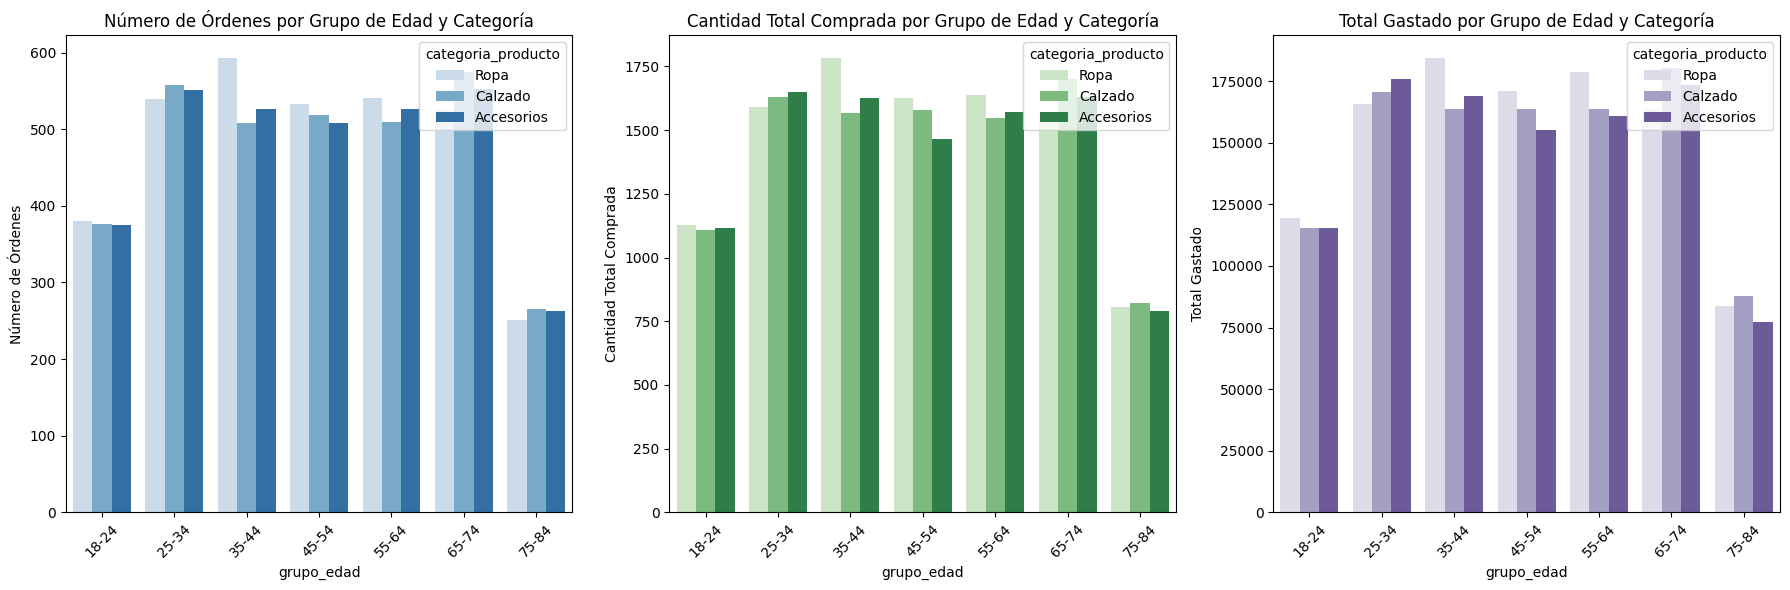

In [18]:
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

conexion = mysql.connector.connect(
    host="34.172.242.238", 
    user="root",        
    password="gerenciales13",  
    database="practica13" 
)

cursor = conexion.cursor()

consulta_categoria_producto_edad = """
SELECT 
    CASE 
        WHEN edad_cliente BETWEEN 18 AND 24 THEN '18-24'
        WHEN edad_cliente BETWEEN 25 AND 34 THEN '25-34'
        WHEN edad_cliente BETWEEN 35 AND 44 THEN '35-44'
        WHEN edad_cliente BETWEEN 45 AND 54 THEN '45-54'
        WHEN edad_cliente BETWEEN 55 AND 64 THEN '55-64'
        WHEN edad_cliente BETWEEN 65 AND 74 THEN '65-74'
        WHEN edad_cliente BETWEEN 75 AND 84 THEN '75-84'
        ELSE '85+'
    END AS grupo_edad,
    categoria_producto,
    COUNT(id_orden) AS numero_ordenes,
    SUM(cantidad_comprada) AS cantidad_total_comprada,
    SUM(total_orden) AS total_gastado
FROM ventas
GROUP BY grupo_edad, categoria_producto
ORDER BY grupo_edad, total_gastado DESC;
"""

cursor.execute(consulta_categoria_producto_edad)

columnas = [col[0] for col in cursor.description]
datos = cursor.fetchall()

df_edad_categoria = pd.DataFrame(datos, columns=columnas)

cursor.close()
conexion.close()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='grupo_edad', y='numero_ordenes', hue='categoria_producto', data=df_edad_categoria, palette='Blues')
plt.title('Número de Órdenes por Grupo de Edad y Categoría')
plt.xticks(rotation=45)
plt.ylabel('Número de Órdenes')

plt.subplot(1, 3, 2)
sns.barplot(x='grupo_edad', y='cantidad_total_comprada', hue='categoria_producto', data=df_edad_categoria, palette='Greens')
plt.title('Cantidad Total Comprada por Grupo de Edad y Categoría')
plt.xticks(rotation=45)
plt.ylabel('Cantidad Total Comprada')

plt.subplot(1, 3, 3)
sns.barplot(x='grupo_edad', y='total_gastado', hue='categoria_producto', data=df_edad_categoria, palette='Purples')
plt.title('Total Gastado por Grupo de Edad y Categoría')
plt.xticks(rotation=45)
plt.ylabel('Total Gastado')

plt.tight_layout()
plt.show()


## 4.2 Comparación de compra entre géneros

- **Predominio de categorías de productos:**
  - En general, la ropa es la categoría que predomina.

- **Preferencias por género:**
  - **Para las mujeres:**
    1. Ropa
    2. Accesorios
    3. Calzado

  - **Para los hombres:**
    1. Calzado
    2. Ropa
    3. Accesorios


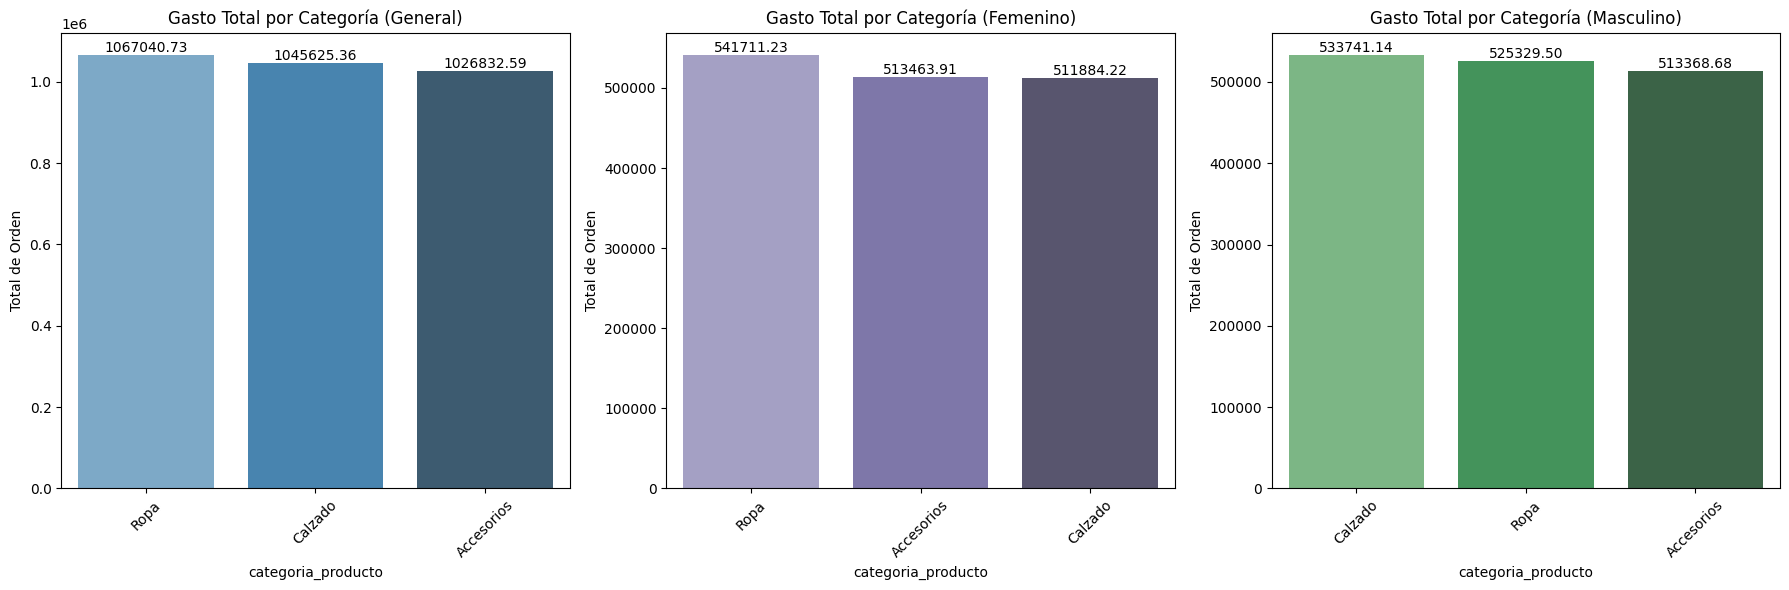

In [19]:
df_general = df.groupby('categoria_producto')['total_orden'].sum().reset_index().sort_values(by='total_orden', ascending=False).head(3)

df_femenino = df[df['genero_cliente'] == 'Femenino'].groupby('categoria_producto')['total_orden'].sum().reset_index().sort_values(by='total_orden', ascending=False).head(3)
df_masculino = df[df['genero_cliente'] == 'Masculino'].groupby('categoria_producto')['total_orden'].sum().reset_index().sort_values(by='total_orden', ascending=False).head(3)

plt.figure(figsize=(18, 6))

def agregar_valores_barras(ax, data):
    """Función para agregar valores encima de las barras."""
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5), 
                    textcoords='offset points')


plt.subplot(1, 3, 1)
ax1 = sns.barplot(x='categoria_producto', y='total_orden', data=df_general, hue='categoria_producto', palette='Blues_d')
plt.title('Gasto Total por Categoría (General)')
plt.xticks(rotation=45)
plt.ylabel('Total de Orden')
agregar_valores_barras(ax1, df_general)

plt.subplot(1, 3, 2)
ax2 = sns.barplot(x='categoria_producto', y='total_orden', data=df_femenino, hue='categoria_producto', palette='Purples_d')
plt.title('Gasto Total por Categoría (Femenino)')
plt.xticks(rotation=45)
plt.ylabel('Total de Orden')
agregar_valores_barras(ax2, df_femenino)

plt.subplot(1, 3, 3)
ax3 = sns.barplot(x='categoria_producto', y='total_orden', data=df_masculino, hue='categoria_producto', palette='Greens_d')
plt.title('Gasto Total por Categoría (Masculino)')
plt.xticks(rotation=45)
plt.ylabel('Total de Orden')
agregar_valores_barras(ax3, df_masculino)

plt.tight_layout()
plt.show()

# 5. Análisis de correlación
## 5.1 Investigación de una relación entre el total de compra y la edad del cliente

Como se visualiza en el gráfico, si bien las personas de 55 a 64 años parecen gastar un poco más, hay muchas otras razones detrás de cuánto gasta cada persona. Para tener una idea más clara, necesitaríamos analizar a los clientes de manera más detallada, considerando factores como sus hábitos, su situación económica y los productos que les interesan. Esto nos permitiría entender mejor por qué algunos grupos gastan más que otros.



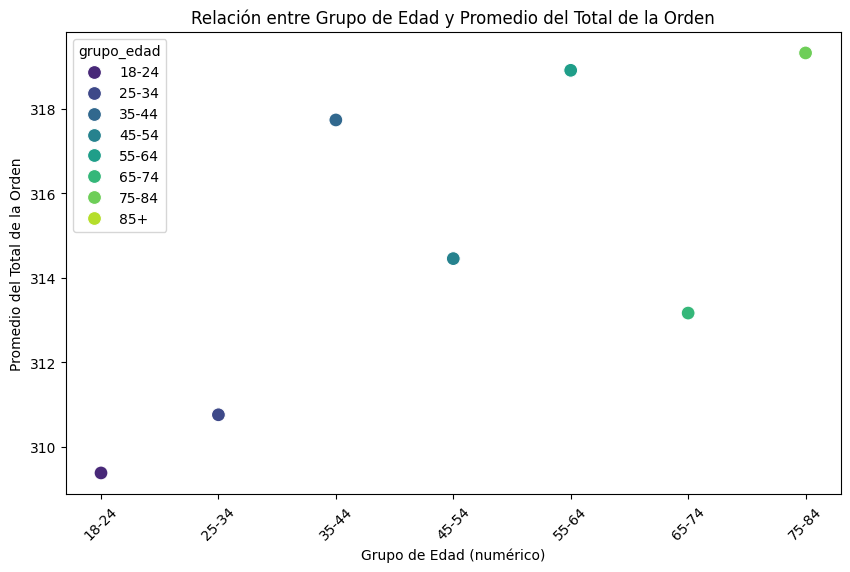

In [20]:
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

# Conectar a la base de datos MySQL
conexion = mysql.connector.connect(
    host="34.172.242.238", 
    user="root",        
    password="gerenciales13",  
    database="practica13" 
)

# Crear el cursor
cursor = conexion.cursor()

# Definir la consulta SQL para obtener los datos necesarios
consulta = """
SELECT edad_cliente, total_orden
FROM ventas
"""

# Ejecutar la consulta
cursor.execute(consulta)

# Obtener los resultados y cargarlos en un DataFrame
columnas = [col[0] for col in cursor.description]  # Obtener nombres de las columnas
datos = cursor.fetchall()  # Obtener todos los datos
df = pd.DataFrame(datos, columns=columnas)

# Cerrar la conexión
cursor.close()
conexion.close()

# Crear una columna para el grupo de edad
def asignar_grupo_edad(edad):
    if 18 <= edad <= 24:
        return '18-24'
    elif 25 <= edad <= 34:
        return '25-34'
    elif 35 <= edad <= 44:
        return '35-44'
    elif 45 <= edad <= 54:
        return '45-54'
    elif 55 <= edad <= 64:
        return '55-64'
    elif 65 <= edad <= 74:
        return '65-74'
    elif 75 <= edad <= 84:
        return '75-84'
    else:
        return '85+'

df['grupo_edad'] = df['edad_cliente'].apply(asignar_grupo_edad)

# Agrupar por rango de edad y calcular el promedio del total de la orden
df_agrupado = df.groupby('grupo_edad').agg({
    'total_orden': 'mean'
}).reset_index()

# Convertir grupo_edad a un tipo categórico ordenado para una visualización mejor
df_agrupado['grupo_edad'] = pd.Categorical(df_agrupado['grupo_edad'], categories=[
    '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'
], ordered=True)

# Reordenar el DataFrame por el grupo de edad
df_agrupado = df_agrupado.sort_values('grupo_edad')

# Calcular la correlación entre el grupo de edad (numérico) y el promedio del total de la orden
df_agrupado['grupo_edad_num'] = df_agrupado['grupo_edad'].cat.codes
correlacion = df_agrupado['grupo_edad_num'].corr(df_agrupado['total_orden'])

# Visualizar la relación con un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grupo_edad_num', y='total_orden', data=df_agrupado, hue='grupo_edad', palette='viridis', s=100)
plt.title('Relación entre Grupo de Edad y Promedio del Total de la Orden')
plt.xlabel('Grupo de Edad (numérico)')
plt.ylabel('Promedio del Total de la Orden')
plt.xticks(ticks=df_agrupado['grupo_edad_num'], labels=df_agrupado['grupo_edad'], rotation=45)
plt.show()


## 5.2 Examinar si hay una correlación entre la categoría del producto y el método de pago preferido

**Basado en la matriz de correlación que se presenta a continuación, podemos concluir que:**

* **No existe una relación lineal fuerte entre la categoría del producto y el método de pago.** Esto indica que la elección del método de pago no está significativamente influenciada por el tipo de producto adquirido. 
* **La elección del método de pago podría estar determinada por otros factores.** Factores como las preferencias personales, la disponibilidad de fondos en cada método, promociones o hábitos de compra establecidos podrían influir en mayor medida en la decisión del cliente.


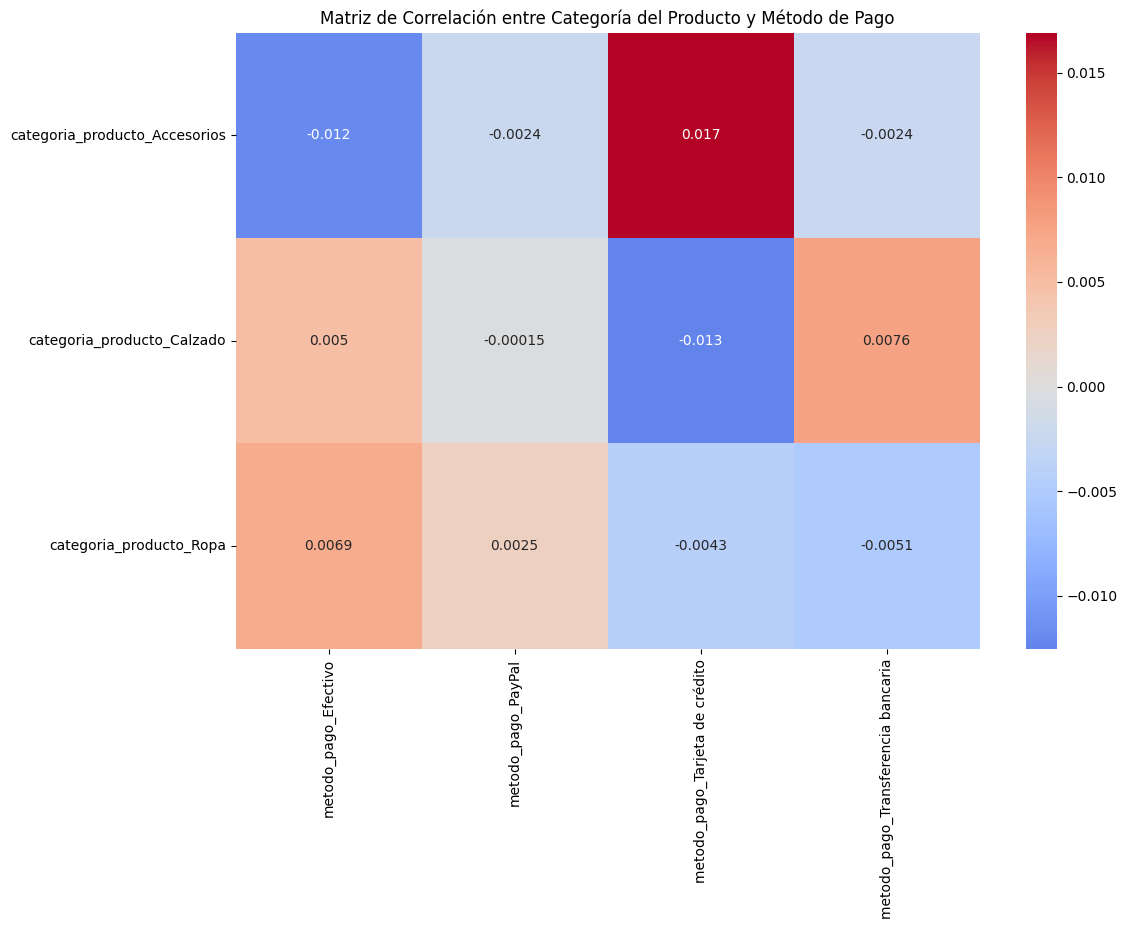

In [21]:
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

# Conectar a la base de datos MySQL
conexion = mysql.connector.connect(
    host="34.172.242.238", 
    user="root",        
    password="gerenciales13",  
    database="practica13" 
)

# Crear el cursor
cursor = conexion.cursor()

# Definir la consulta SQL para obtener los datos necesarios
consulta = """
SELECT categoria_producto, metodo_pago
FROM ventas
"""

# Ejecutar la consulta
cursor.execute(consulta)

# Obtener los resultados y cargarlos en un DataFrame
columnas = [col[0] for col in cursor.description]  # Obtener nombres de las columnas
datos = cursor.fetchall()  # Obtener todos los datos
df = pd.DataFrame(datos, columns=columnas)

# Cerrar la conexión
cursor.close()
conexion.close()

# Convertir variables categóricas en variables dummy
df_encoded = pd.get_dummies(df, columns=['categoria_producto', 'metodo_pago'])

# Seleccionar las columnas dummy correspondientes a las categorías de productos y métodos de pago
categorias_dummies = [col for col in df_encoded.columns if 'categoria_producto_' in col]
metodos_dummies = [col for col in df_encoded.columns if 'metodo_pago_' in col]

# Crear un DataFrame solo con las variables dummy de interés
df_dummies = df_encoded[categorias_dummies + metodos_dummies]

# Calcular la matriz de correlación solo entre las variables dummy de interés
correlacion_matrix = df_dummies.corr()

# Seleccionar las columnas de interés para visualizar la correlación
correlacion_categoria_metodo = correlacion_matrix.loc[categorias_dummies, metodos_dummies]

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_categoria_metodo, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Categoría del Producto y Método de Pago')
plt.show()


## 6. Visualización de datos

### 1. Gráfico de Barras - Categoría del Producto y Frecuencia
Este gráfico de barras muestra la frecuencia de cada categoría de producto en los datos de ventas. Permite identificar qué categorías de productos son más comunes.


### 2. Gráfico de Dispersión - Relación entre Edad del Cliente y Total de la Orden
El gráfico de dispersión ilustra la relación entre la edad del cliente y el total de la orden. Cada punto representa una transacción, mostrando cómo varía el total de la orden con respecto a la edad del cliente.


### 3. Gráfico de Torta - Distribución por Método de Pago
Este gráfico de torta representa la distribución de las ventas según el método de pago. Muestra la proporción de cada método de pago utilizado en las transacciones.


### 4. Gráfico de Líneas - Evolución del Total de Órdenes a lo Largo del Tiempo
El gráfico de líneas muestra la evolución mensual del total de órdenes a lo largo del tiempo. Ayuda a identificar tendencias y patrones estacionales en las ventas.


### 5. Gráfico de Cajas - Distribución del Total de la Orden por Categoría de Producto
Este gráfico de cajas muestra la distribución del total de la orden para cada categoría de producto. Incluye la mediana, cuartiles y valores atípicos, proporcionando una visión detallada de las variaciones en los montos de las órdenes según la categoría del producto.


### 6. Gráfico de Barras Apilado Segmentado por Grupo de Edad
El gráfico de barras apilado ilustra la distribución de diferentes grupos de edad por método de pago. Cada barra representa un método de pago y está segmentada por los grupos de edad, mostrando la proporción de cada grupo de edad dentro de cada método de pago.


### 7. Heatmap de Correlación entre Edad del Cliente y Total de la Orden
El heatmap muestra la correlación entre la edad del cliente y el total de la orden. Los valores de correlación están representados con un mapa de colores, lo que facilita la identificación de la fuerza y dirección de la relación entre estas dos variables.


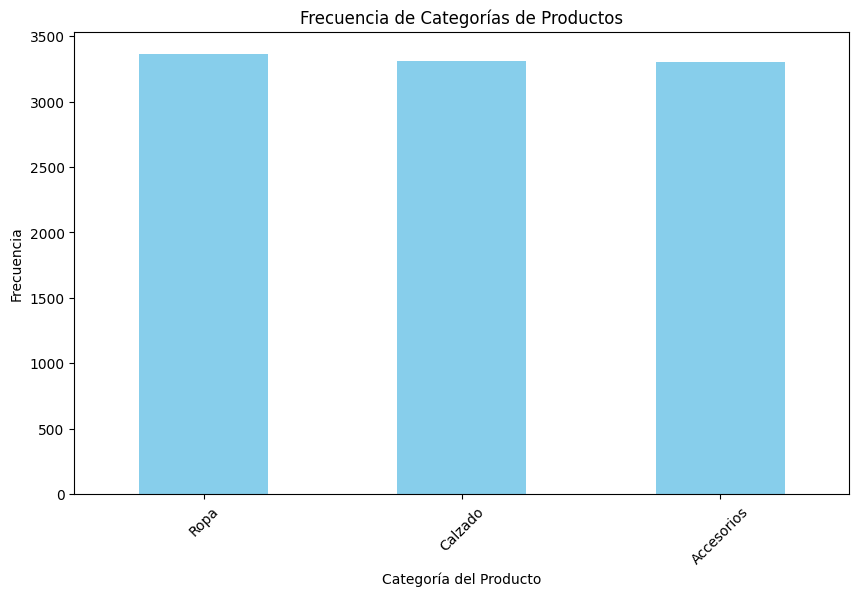

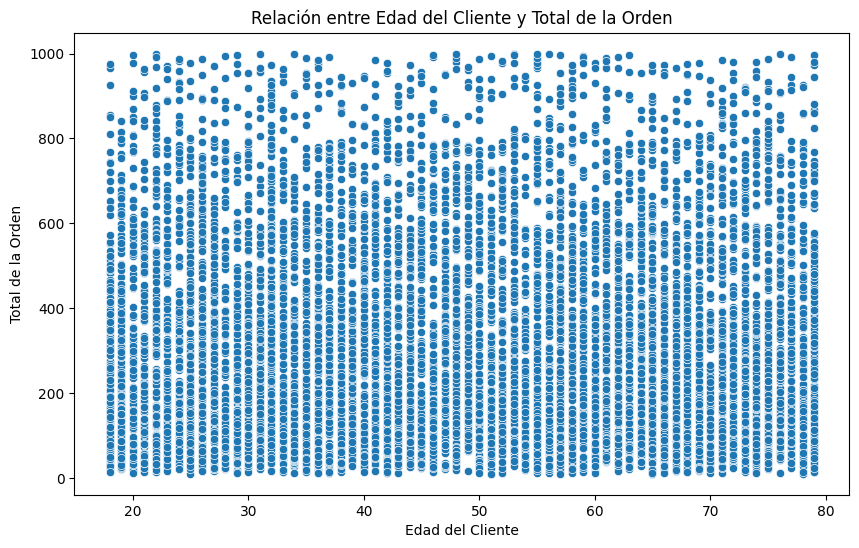

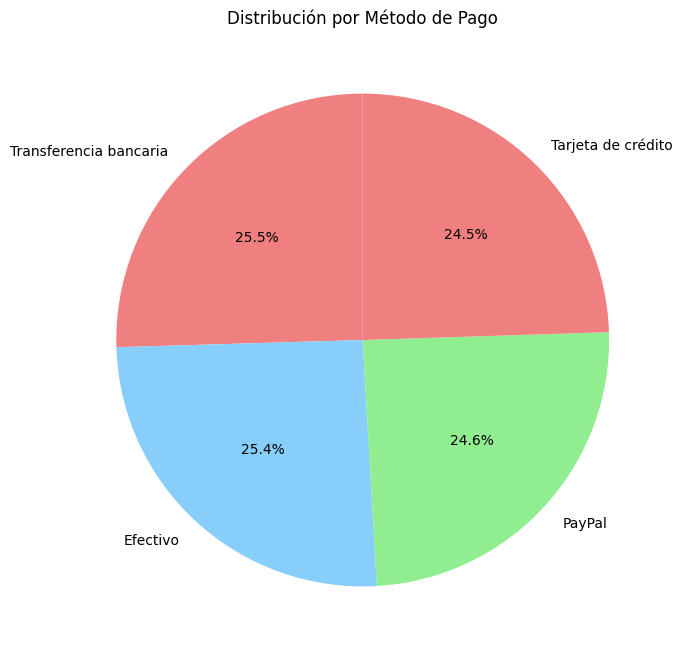

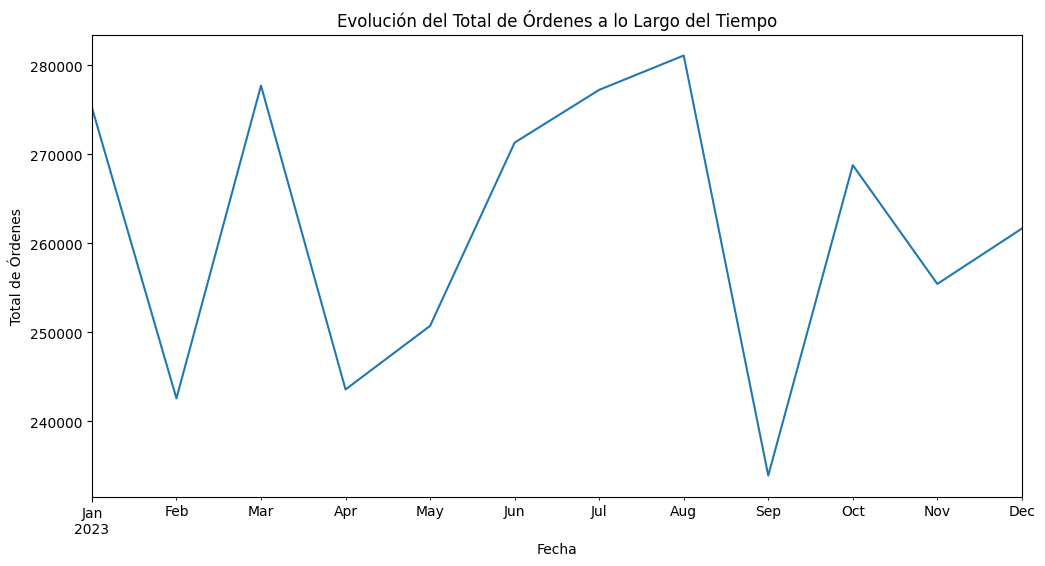

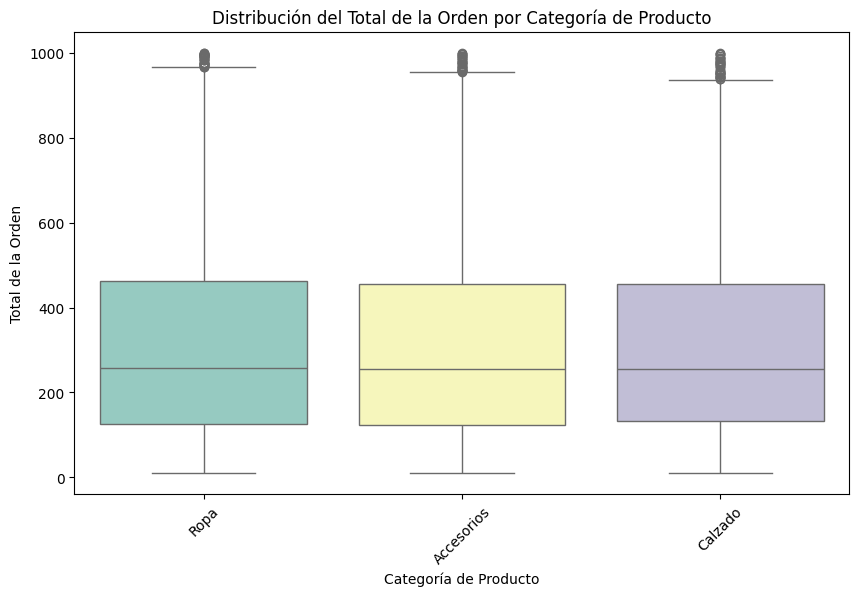

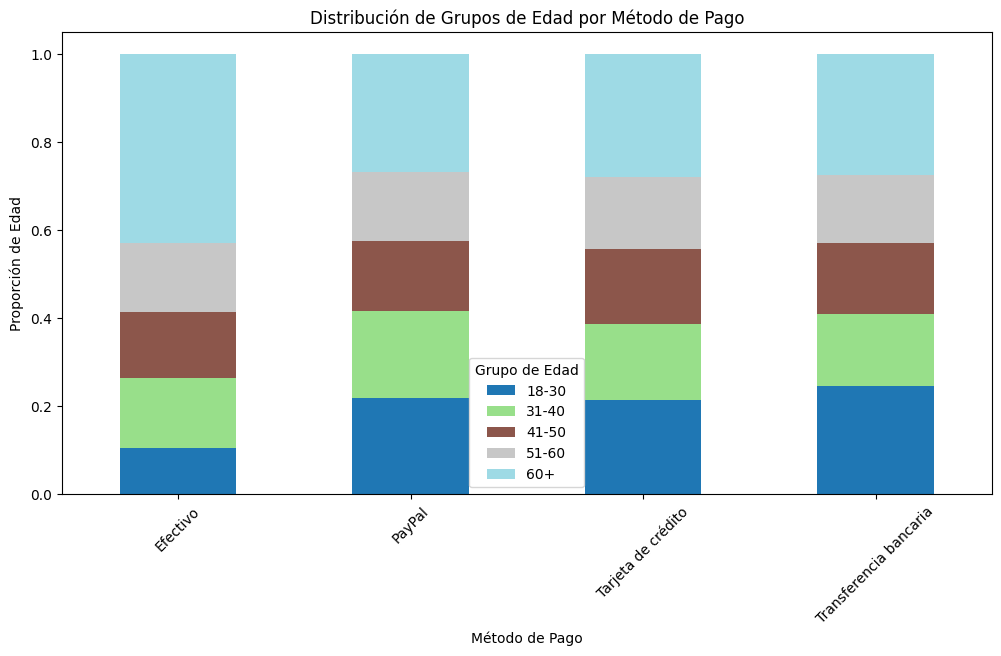

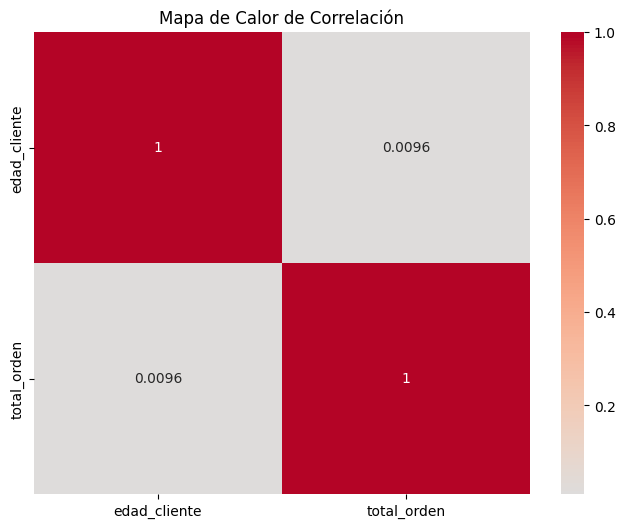

In [22]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos MySQL
conexion = mysql.connector.connect(
    host="34.172.242.238", 
    user="root",        
    password="gerenciales13",  
    database="practica13" 
)

# Crear el cursor
cursor = conexion.cursor()

# Definir la consulta SQL para obtener los datos necesarios
consulta = """
SELECT fecha_compra, total_orden, edad_cliente, categoria_producto, metodo_pago
FROM ventas
"""

# Ejecutar la consulta
cursor.execute(consulta)

# Obtener los resultados y cargarlos en un DataFrame
columnas = [col[0] for col in cursor.description]  # Obtener nombres de las columnas
datos = cursor.fetchall()  # Obtener todos los datos
df = pd.DataFrame(datos, columns=columnas)

# Cerrar la conexión
cursor.close()
conexion.close()

# Conversión de columnas a tipos adecuados
df['total_orden'] = pd.to_numeric(df['total_orden'], errors='coerce')  # Convertir total_orden a numérico
df['edad_cliente'] = pd.to_numeric(df['edad_cliente'], errors='coerce')  # Convertir edad_cliente a numérico
df['fecha_compra'] = pd.to_datetime(df['fecha_compra'], errors='coerce')  # Convertir fecha_compra a datetime

# Eliminar filas con valores inválidos
df = df.dropna(subset=['total_orden', 'edad_cliente', 'fecha_compra'])

# Gráfico 1: Gráfico de Barras - Categoría del producto y frecuencia
plt.figure(figsize=(10, 6))
df['categoria_producto'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Categorías de Productos')
plt.xlabel('Categoría del Producto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Gráfico 2: Gráfico de Dispersión - Relación entre Edad del Cliente y Total de la Orden
plt.figure(figsize=(10, 6))
sns.scatterplot(x='edad_cliente', y='total_orden', data=df)
plt.title('Relación entre Edad del Cliente y Total de la Orden')
plt.xlabel('Edad del Cliente')
plt.ylabel('Total de la Orden')
plt.show()

# Gráfico 3: Gráfico de Torta - Distribución por Método de Pago
plt.figure(figsize=(8, 8))
df['metodo_pago'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Distribución por Método de Pago')
plt.ylabel('')
plt.show()

# Gráfico 4: Gráfico de Líneas - Evolución del Total de Órdenes a lo Largo del Tiempo
df.set_index('fecha_compra', inplace=True)
df_resample = df['total_orden'].resample('MS').sum()  # Suma mensual al inicio del mes
if not df_resample.empty:
    plt.figure(figsize=(12, 6))
    df_resample.plot()
    plt.title('Evolución del Total de Órdenes a lo Largo del Tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Total de Órdenes')
    plt.show()

# Gráfico 5: Gráfico de Cajas - Distribución del Total de la Orden por Categoría de Producto
plt.figure(figsize=(10, 6))
sns.boxplot(x='categoria_producto', y='total_orden', data=df, hue='categoria_producto', palette='Set3')
plt.title('Distribución del Total de la Orden por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Total de la Orden')
plt.xticks(rotation=45)
plt.show()

# Gráfico 6: Gráfico de Barras Apilado Segmentado por Grupo de Edad
# Crear los grupos de edad para segmentar
df['grupo_edad'] = pd.cut(df['edad_cliente'], bins=[18, 30, 40, 50, 60, 100], 
                          labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Gráfico de barras apilado - Distribución de grupos de edad por método de pago
edad_metodo_pago = pd.crosstab(df['metodo_pago'], df['grupo_edad'], normalize='index')

edad_metodo_pago.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Distribución de Grupos de Edad por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Proporción de Edad')
plt.xticks(rotation=45)
plt.legend(title='Grupo de Edad')
plt.show()


# Gráfico 7: Heatmap de Correlación entre Edad del Cliente, Total de la Orden
plt.figure(figsize=(8, 6))
correlacion = df[['edad_cliente', 'total_orden']].corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlación')
plt.show()
